In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
Y = iris.target
X = iris.data
names = iris.feature_names
print(names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(Y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

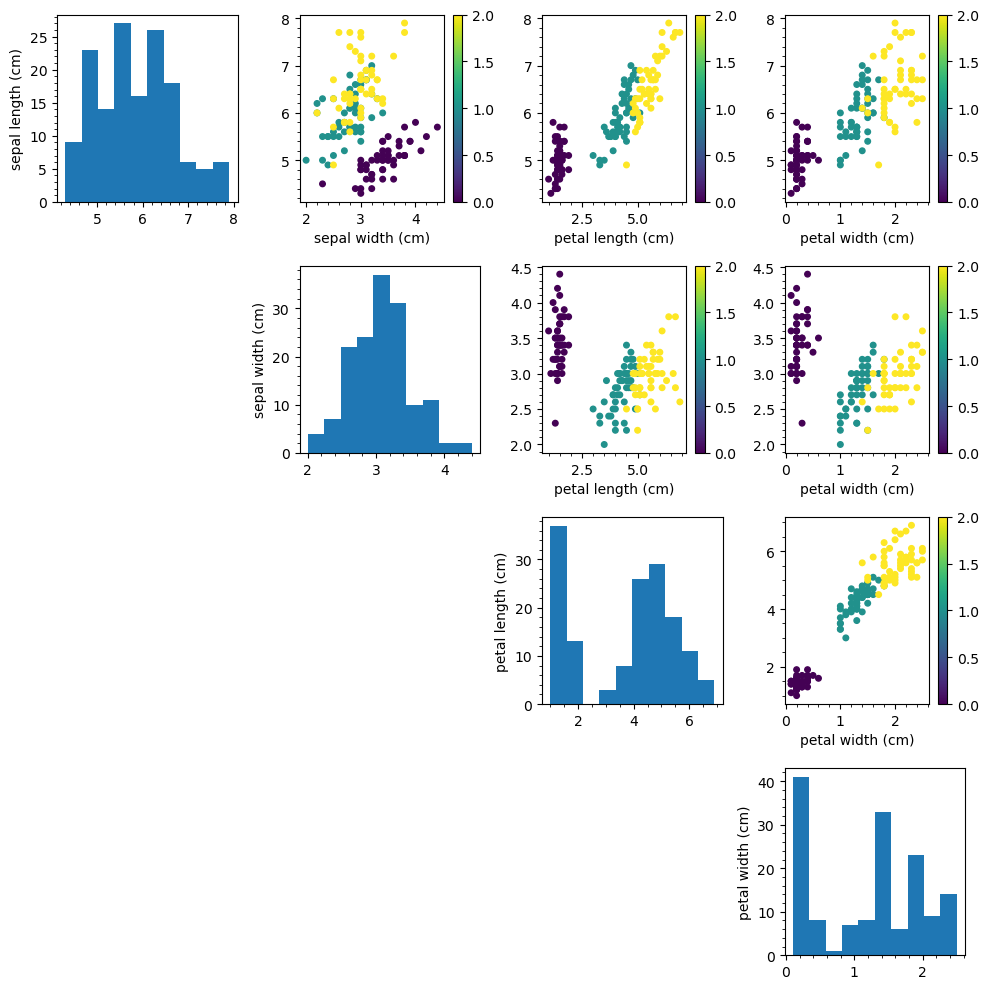

In [6]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(i,4):
        k = 4*i+j+1
        plt.subplot(4, 4, k)
        if i == j:
            plt.hist(X[:,i])
            plt.ylabel(names[i])
        else:
            cs = plt.scatter(X[:,j], X[:,i], c=Y, s=16)
            plt.colorbar(cs)
            plt.xlabel(names[j])
        plt.minorticks_on()
plt.tight_layout()
plt.show()

In [7]:
import sklearn.svm as svm

In [8]:
clf = svm.SVC(kernel='linear')

In [9]:
clf.fit(X, Y)

SVC(kernel='linear')

In [10]:
import sklearn.metrics as metrics

In [11]:
Y_p = clf.predict(X)

In [12]:
metrics.accuracy_score(Y, Y_p)

0.9933333333333333

In [13]:
N = len(X)
I = np.array([k for k in range(N) if Y[k] != Y_p[k]])
print(I)
XI = X[I]
YI = Y[I]

[83]


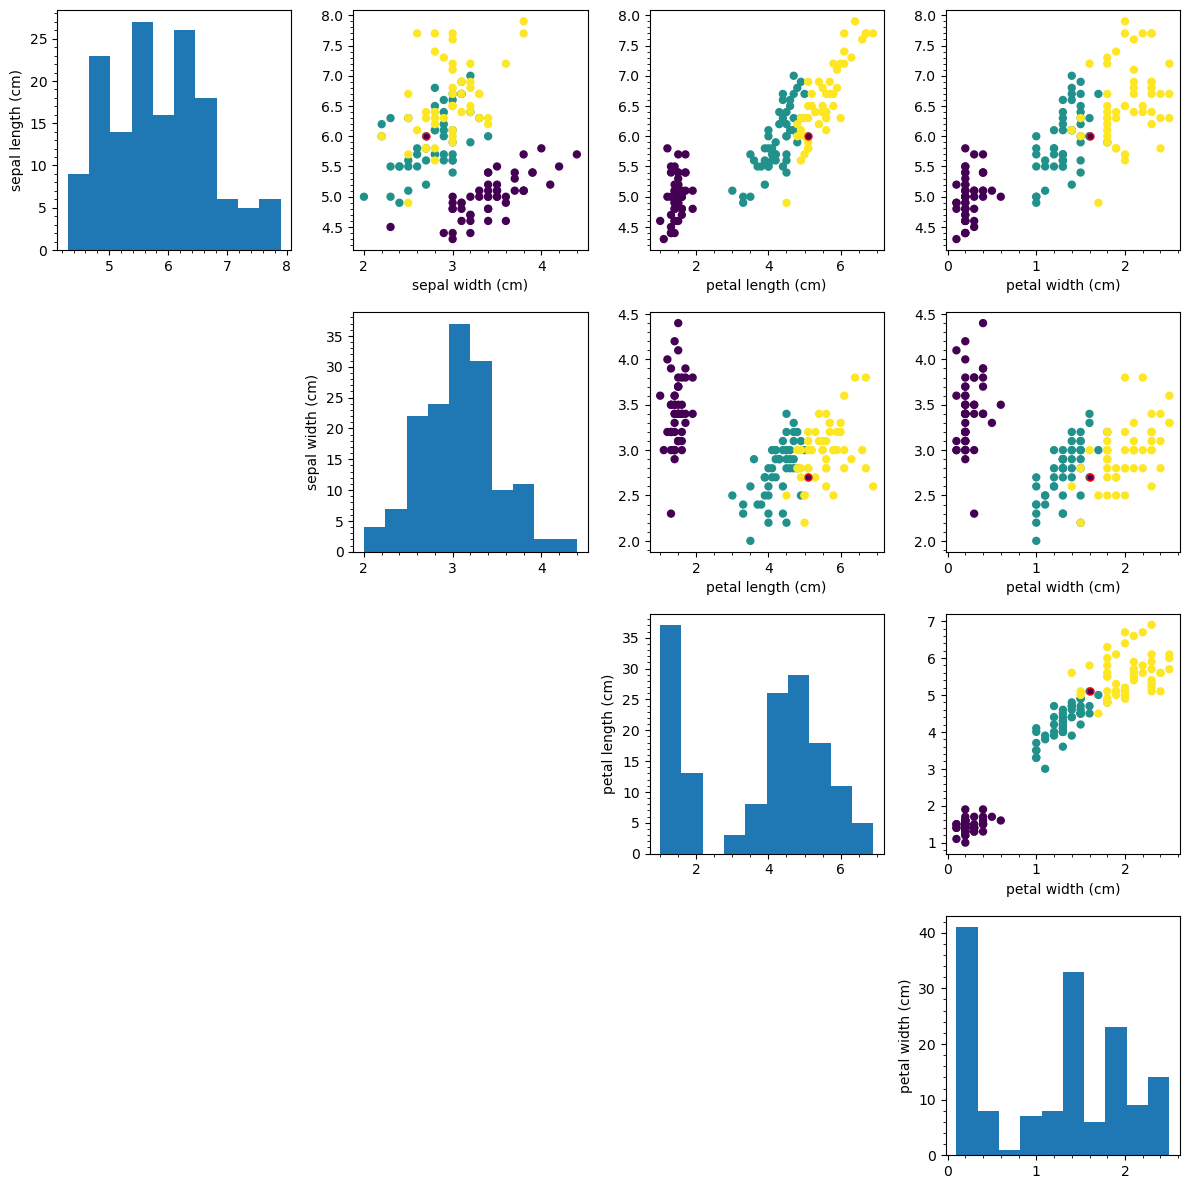

In [14]:
plt.figure(figsize=(12,12))
for i in range(4):
    for j in range(i,4):
        k = 4*i+j+1
        plt.subplot(4, 4, k)
        if i == j:
            plt.hist(X[:,i])
            plt.ylabel(names[i])
        else:
            plt.scatter(X[:,j], X[:,i], c=Y, s=25)
            plt.scatter(XI[:,j], XI[:,i], c=YI, s=25, edgecolors='r')
            plt.xlabel(names[j])
        plt.minorticks_on()
plt.tight_layout()
plt.show()